# 개인 EDA

In [2]:
import numpy as np
import pandas as pd
import urllib.request
import requests 
import json
import urllib.parse

In [3]:
key = 'dybiMygGG%2FFEeMOHI94Uls8MeRG%2B8IGw2DXQXL%2Fwq8WtYWCcbTXleT2RuMeiwKSpS9o0LsoQVolE%2FkUG17eH2Q%3D%3D'

u = 'http://apis.data.go.kr/1160100/service/GetCredCardCompInfoService/getCredCardCompGeneInfo?serviceKey='
r = '&title='
hangul = '신용카드_일반현황_임직원현황'
encode = urllib.parse.quote_plus(hangul)
l = '&numOfRows=10000&pageNo=1&resultType=json&basYm=202012'
url = u+key+r+encode+l
print(url)
response = urllib.request.urlopen(url)
data1 = json.loads(response.read().decode("utf-8"))
data1

http://apis.data.go.kr/1160100/service/GetCredCardCompInfoService/getCredCardCompGeneInfo?serviceKey=dybiMygGG%2FFEeMOHI94Uls8MeRG%2B8IGw2DXQXL%2Fwq8WtYWCcbTXleT2RuMeiwKSpS9o0LsoQVolE%2FkUG17eH2Q%3D%3D&title=%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%9D%BC%EB%B0%98%ED%98%84%ED%99%A9_%EC%9E%84%EC%A7%81%EC%9B%90%ED%98%84%ED%99%A9&numOfRows=10000&pageNo=1&resultType=json&basYm=202012


{'response': {'body': {'tableList': [{'items': {'item': [{'basYm': '202012',
        'crno': '1101110377203',
        'fncoCd': '0010225',
        'fncoNm': '현대카드㈜',
        'xcsmCnt': '1899',
        'xcsmDcd': 'A',
        'xcsmDcdNm': '총임직원'},
       {'basYm': '202012',
        'crno': '1101110641434',
        'fncoCd': '0010226',
        'fncoNm': '롯데카드㈜',
        'xcsmCnt': '1396',
        'xcsmDcd': 'A',
        'xcsmDcdNm': '총임직원'},
       {'basYm': '202012',
        'crno': '1101110356695',
        'fncoCd': '0010227',
        'fncoNm': '비씨카드㈜',
        'xcsmCnt': '861',
        'xcsmDcd': 'A',
        'xcsmDcdNm': '총임직원'},
       {'basYm': '202012',
        'crno': '1101110346901',
        'fncoCd': '0010228',
        'fncoNm': '삼성카드㈜',
        'xcsmCnt': '2057',
        'xcsmDcd': 'A',
        'xcsmDcdNm': '총임직원'},
       {'basYm': '202012',
        'crno': '1101110412926',
        'fncoCd': '0010229',
        'fncoNm': '신한카드㈜',
        'xcsmCnt': '2631',
        'xcsmDcd': '

In [4]:
temp = data1['response']['body']['tableList'][0]['items']['item']
temp

[{'basYm': '202012',
  'crno': '1101110377203',
  'fncoCd': '0010225',
  'fncoNm': '현대카드㈜',
  'xcsmCnt': '1899',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101110641434',
  'fncoCd': '0010226',
  'fncoNm': '롯데카드㈜',
  'xcsmCnt': '1396',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101110356695',
  'fncoCd': '0010227',
  'fncoNm': '비씨카드㈜',
  'xcsmCnt': '861',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101110346901',
  'fncoCd': '0010228',
  'fncoNm': '삼성카드㈜',
  'xcsmCnt': '2057',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101110412926',
  'fncoCd': '0010229',
  'fncoNm': '신한카드㈜',
  'xcsmCnt': '2631',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101114546523',
  'fncoCd': '0012627',
  'fncoNm': '㈜케이비국민카드',
  'xcsmCnt': '1618',
  'xcsmDcd': 'A',
  'xcsmDcdNm': '총임직원'},
 {'basYm': '202012',
  'crno': '1101115101839',
  'fncoCd': '0013361

In [5]:
card_df = pd.DataFrame()
card_df_temp = pd.DataFrame()
card_df_temp = card_df_temp.append({"회사명":"","임직원구분":"","임직원수":""}, ignore_index = True)
card_df_temp

,회사명,임직원구분,임직원수
0,,,


In [6]:
id_coName = card_df_temp.columns.get_loc("회사명")
id_DcdNm = card_df_temp.columns.get_loc("임직원구분")
id_csmCnt = card_df_temp.columns.get_loc("임직원수")
num = len(data1['response']['body']['tableList'][0]['items']['item'])
for i in range(0,num):
    i_info = data1['response']['body']['tableList'][0]['items']['item'][i]
    card_df_temp.iat[0,id_coName] = i_info['fncoNm']
    card_df_temp.iat[0,id_DcdNm] = i_info['xcsmDcdNm'] 
    card_df_temp.iat[0,id_csmCnt] = i_info['xcsmCnt'] 
    card_df = card_df.append(card_df_temp, ignore_index = True)
    
    for j in range(len(card_df_temp.columns)):
        card_df_temp.iat[0,j] = ""

card_df

,회사명,임직원구분,임직원수
0,현대카드㈜,총임직원,1899
1,롯데카드㈜,총임직원,1396
2,비씨카드㈜,총임직원,861
3,삼성카드㈜,총임직원,2057
4,신한카드㈜,총임직원,2631
...,...,...,...
58,신한카드㈜,직원_비정규직원,172
59,㈜케이비국민카드,직원_비정규직원,21
60,㈜우리카드,직원_비정규직원,96
61,하나카드㈜,직원_비정규직원,32


In [7]:
card_df.drop(labels=range(18, 45), axis=0,inplace = True) 

In [8]:
card_df

,회사명,임직원구분,임직원수
0,현대카드㈜,총임직원,1899
1,롯데카드㈜,총임직원,1396
2,비씨카드㈜,총임직원,861
3,삼성카드㈜,총임직원,2057
4,신한카드㈜,총임직원,2631
5,㈜케이비국민카드,총임직원,1618
6,㈜우리카드,총임직원,866
7,하나카드㈜,총임직원,763
8,신용카드사,총임직원,12091
9,현대카드㈜,임원,26


In [9]:
h_rate = []
m_rate = []
l_rate = []
for i in range(0,9):
    h_rate.append(round(int(card_df.iat[i+9,id_csmCnt])/int(card_df.iat[i,id_csmCnt]),2))
    m_rate.append(round(int(card_df.iat[i+18,id_csmCnt])/int(card_df.iat[i,id_csmCnt]),2))
    l_rate.append(round(int(card_df.iat[i+27,id_csmCnt])/int(card_df.iat[i,id_csmCnt]),2))

In [10]:
csm_data = pd.DataFrame({"회사명":card_df.iloc[0:9,id_coName],"총임직원수" : card_df.iloc[0:9,id_csmCnt], "임원비율":h_rate,"정규직비율":m_rate,"비정규직비율":l_rate})
csm_data

,회사명,총임직원수,임원비율,정규직비율,비정규직비율
0,현대카드㈜,1899,0.01,0.73,0.26
1,롯데카드㈜,1396,0.02,0.85,0.13
2,비씨카드㈜,861,0.03,0.86,0.11
3,삼성카드㈜,2057,0.01,0.86,0.12
4,신한카드㈜,2631,0.00,0.93,0.07
5,㈜케이비국민카드,1618,0.00,0.98,0.01
6,㈜우리카드,866,0.02,0.87,0.11
7,하나카드㈜,763,0.02,0.93,0.04
8,신용카드사,12091,0.01,0.87,0.11


In [11]:
u = 'http://apis.data.go.kr/1160100/service/GetCredCardCompInfoService/getCredCardCompMajoBusiActi?serviceKey='
hangul = '신용카드_주요영업활동_신용카드이용실적'
encode = urllib.parse.quote_plus(hangul)
l = '&numOfRows=10000&pageNo=1&resultType=json&basYm=202012'
url = u+key+r+encode+l
print(url)
response = urllib.request.urlopen(url)
data2 = json.loads(response.read().decode("utf-8"))
data2

http://apis.data.go.kr/1160100/service/GetCredCardCompInfoService/getCredCardCompMajoBusiActi?serviceKey=dybiMygGG%2FFEeMOHI94Uls8MeRG%2B8IGw2DXQXL%2Fwq8WtYWCcbTXleT2RuMeiwKSpS9o0LsoQVolE%2FkUG17eH2Q%3D%3D&title=%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%A3%BC%EC%9A%94%EC%98%81%EC%97%85%ED%99%9C%EB%8F%99_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%EC%9D%B4%EC%9A%A9%EC%8B%A4%EC%A0%81&numOfRows=10000&pageNo=1&resultType=json&basYm=202012


{'response': {'body': {'tableList': [{'items': {'item': [{'basYm': '202012',
        'crcdUzAtrsItemCd': 'A1',
        'crcdUzAtrsItemCdNm': '개인_일시불',
        'crcdUzAtrsItemCmtlAmt': '64598790000000',
        'crcdUzAtrsItemThqrAmt': '17126776000000',
        'crno': '1101110377203',
        'fncoCd': '0010225',
        'fncoNm': '현대카드㈜'},
       {'basYm': '202012',
        'crcdUzAtrsItemCd': 'A1',
        'crcdUzAtrsItemCdNm': '개인_일시불',
        'crcdUzAtrsItemCmtlAmt': '38852350000000',
        'crcdUzAtrsItemThqrAmt': '9839974000000',
        'crno': '1101110641434',
        'fncoCd': '0010226',
        'fncoNm': '롯데카드㈜'},
       {'basYm': '202012',
        'crcdUzAtrsItemCd': 'A1',
        'crcdUzAtrsItemCdNm': '개인_일시불',
        'crcdUzAtrsItemCmtlAmt': '93556000000',
        'crcdUzAtrsItemThqrAmt': '22824000000',
        'crno': '1101110356695',
        'fncoCd': '0010227',
        'fncoNm': '비씨카드㈜'},
       {'basYm': '202012',
        'crcdUzAtrsItemCd': 'A1',
        'crcdUzAt

In [12]:
temp = data2['response']['body']['tableList'][0]['items']['item']
temp

[{'basYm': '202012',
  'crcdUzAtrsItemCd': 'A1',
  'crcdUzAtrsItemCdNm': '개인_일시불',
  'crcdUzAtrsItemCmtlAmt': '64598790000000',
  'crcdUzAtrsItemThqrAmt': '17126776000000',
  'crno': '1101110377203',
  'fncoCd': '0010225',
  'fncoNm': '현대카드㈜'},
 {'basYm': '202012',
  'crcdUzAtrsItemCd': 'A1',
  'crcdUzAtrsItemCdNm': '개인_일시불',
  'crcdUzAtrsItemCmtlAmt': '38852350000000',
  'crcdUzAtrsItemThqrAmt': '9839974000000',
  'crno': '1101110641434',
  'fncoCd': '0010226',
  'fncoNm': '롯데카드㈜'},
 {'basYm': '202012',
  'crcdUzAtrsItemCd': 'A1',
  'crcdUzAtrsItemCdNm': '개인_일시불',
  'crcdUzAtrsItemCmtlAmt': '93556000000',
  'crcdUzAtrsItemThqrAmt': '22824000000',
  'crno': '1101110356695',
  'fncoCd': '0010227',
  'fncoNm': '비씨카드㈜'},
 {'basYm': '202012',
  'crcdUzAtrsItemCd': 'A1',
  'crcdUzAtrsItemCdNm': '개인_일시불',
  'crcdUzAtrsItemCmtlAmt': '63359454000000',
  'crcdUzAtrsItemThqrAmt': '16390476000000',
  'crno': '1101110346901',
  'fncoCd': '0010228',
  'fncoNm': '삼성카드㈜'},
 {'basYm': '202012',
  'crc

In [13]:
use_data = pd.DataFrame()
use_data_temp = pd.DataFrame()
use_data_temp = use_data_temp.append({"회사명":"","이용실적누계액":"","카드점유율":""}, ignore_index = True)
use_data_temp

,회사명,이용실적누계액,카드점유율
0,,,


In [14]:
id_coNm = use_data_temp.columns.get_loc("회사명")
id_ctmlAmt = use_data_temp.columns.get_loc("이용실적누계액")
num = len(data2['response']['body']['tableList'][0]['items']['item'])
for i in range(num):
    i_info = data2['response']['body']['tableList'][0]['items']['item'][i]
    if i_info['crcdUzAtrsItemCdNm'] == "총계_이용실적":
        use_data_temp.iat[0,id_coNm] = i_info['fncoNm'] 
        use_data_temp.iat[0,id_ctmlAmt] = i_info['crcdUzAtrsItemCmtlAmt']
    else:
        pass
    use_data = use_data.append(use_data_temp, ignore_index = True)
    
    for j in range(len(use_data_temp.columns)):
        use_data_temp.iat[0,j] = ""

use_data

,회사명,이용실적누계액,카드점유율
0,,,
1,,,
2,,,
3,,,
4,,,
...,...,...,...
157,신한카드㈜,149831676000000,
158,㈜케이비국민카드,116424968000000,
159,㈜우리카드,63475834000000,
160,하나카드㈜,53116775000000,


In [15]:
use_data['회사명'].replace('', np.nan, inplace=True)
use_data['이용실적누계액'].replace('', np.nan, inplace=True)
use_data = use_data.dropna(axis = 0)
use_data

,회사명,이용실적누계액,카드점유율
153,현대카드㈜,112579870000000,
154,롯데카드㈜,71160461000000,
155,비씨카드㈜,433730000000,
156,삼성카드㈜,123872095000000,
157,신한카드㈜,149831676000000,
158,㈜케이비국민카드,116424968000000,
159,㈜우리카드,63475834000000,
160,하나카드㈜,53116775000000,
161,신용카드사,690895409000000,


In [16]:
for i in range(153,162):
    use_data["카드점유율"][i] = round(int(use_data["이용실적누계액"][i]) / int(use_data["이용실적누계액"][161])*100,2)
use_data

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/1664912918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data["카드점유율"][i] = round(int(use_data["이용실적누계액"][i]) / int(use_data["이용실적누계액"][161])*100,2)


,회사명,이용실적누계액,카드점유율
153,현대카드㈜,112579870000000,16.29
154,롯데카드㈜,71160461000000,10.3
155,비씨카드㈜,433730000000,0.06
156,삼성카드㈜,123872095000000,17.93
157,신한카드㈜,149831676000000,21.69
158,㈜케이비국민카드,116424968000000,16.85
159,㈜우리카드,63475834000000,9.19
160,하나카드㈜,53116775000000,7.69
161,신용카드사,690895409000000,100.0


In [17]:
dat = pd.merge(csm_data,use_data, how ="inner", left_on="회사명", right_on = "회사명")
dat

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,이용실적누계액,카드점유율
0,현대카드㈜,1899,0.01,0.73,0.26,112579870000000,16.29
1,롯데카드㈜,1396,0.02,0.85,0.13,71160461000000,10.3
2,비씨카드㈜,861,0.03,0.86,0.11,433730000000,0.06
3,삼성카드㈜,2057,0.01,0.86,0.12,123872095000000,17.93
4,신한카드㈜,2631,0.00,0.93,0.07,149831676000000,21.69
5,㈜케이비국민카드,1618,0.00,0.98,0.01,116424968000000,16.85
6,㈜우리카드,866,0.02,0.87,0.11,63475834000000,9.19
7,하나카드㈜,763,0.02,0.93,0.04,53116775000000,7.69
8,신용카드사,12091,0.01,0.87,0.11,690895409000000,100.0


In [18]:
dat.rename(index = {"현대카드㈜":"현대카드","롯데카드㈜":"롯데카드","비씨카드㈜":"비씨카드","삼성카드㈜":"삼성카드","신한카드㈜":"신한카드","㈜케이비국민카드":"케이비국민카드","㈜우리카드":"우리카드","하나카드㈜":"하나카드"}, inplace = True)
dat

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,이용실적누계액,카드점유율
0,현대카드㈜,1899,0.01,0.73,0.26,112579870000000,16.29
1,롯데카드㈜,1396,0.02,0.85,0.13,71160461000000,10.3
2,비씨카드㈜,861,0.03,0.86,0.11,433730000000,0.06
3,삼성카드㈜,2057,0.01,0.86,0.12,123872095000000,17.93
4,신한카드㈜,2631,0.00,0.93,0.07,149831676000000,21.69
5,㈜케이비국민카드,1618,0.00,0.98,0.01,116424968000000,16.85
6,㈜우리카드,866,0.02,0.87,0.11,63475834000000,9.19
7,하나카드㈜,763,0.02,0.93,0.04,53116775000000,7.69
8,신용카드사,12091,0.01,0.87,0.11,690895409000000,100.0


In [19]:
from urllib import request
from zipfile import ZipFile
import ssl, os
	
context = ssl._create_unverified_context()

API_KEY="224251e6deae9d5396fa07a90ccb1f4d320cf4ba"
url = "https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key="+API_KEY
print("요청주소 : " + url)

data = request.urlopen(url, context=context)
filename = data.info().get_filename()
print("파일명 : " + filename)

with open(filename, 'wb') as f:
    f.write(data.read())
    f.close

print("다운로드 완료.")

with ZipFile(filename, 'r') as zipObj:
   zipObj.extractall('./') # 현재 디렉토리에 압축을 해제

if os.path.isfile(filename):
  os.remove(filename) # 원본 압축파일 삭제

요청주소 : https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key=224251e6deae9d5396fa07a90ccb1f4d320cf4ba
파일명 : CORPCODE.zip
다운로드 완료.


In [20]:
### 모듈 import
import xml.etree.ElementTree as ET

### 압축파일 안의 xml 파일 읽기
tree = ET.parse('corpCode.xml')
root = tree.getroot()

In [21]:
### 회사 이름으로 회사 고유번호 찾기
def find_corp_num(find_name):
    for country in root.iter("list"):
        if country.findtext("corp_name") == find_name:
            return country.findtext("corp_code")

In [22]:
find_corp_num('신한카드')

'00426998'

In [23]:
code = {'현대카드':find_corp_num('현대카드'),'롯데카드':find_corp_num('롯데카드'),
        '비씨카드':find_corp_num('비씨카드'),'삼성카드':find_corp_num('삼성카드'),
        '신한카드':find_corp_num('신한카드'),'케이비국민카드':find_corp_num('케이비국민카드'),
        '우리카드':find_corp_num('우리카드'), '하나카드':find_corp_num('하나카드')}
code

{'현대카드': '00222374',
 '롯데카드': '00219051',
 '비씨카드': '00124656',
 '삼성카드': '00126292',
 '신한카드': '00426998',
 '케이비국민카드': '00857392',
 '우리카드': '00958822',
 '하나카드': '01042623'}

In [24]:
data3 = []
for i in code.keys():
    key = '224251e6deae9d5396fa07a90ccb1f4d320cf4ba'
    u = 'https://opendart.fss.or.kr/api/empSttus.json?crtfc_key='
    r = '&corp_code='
    l = '&bsns_year=2020&reprt_code=11011'
    url = u+key+r+code[str(i)]+l
    response = urllib.request.urlopen(url)
    data3.append(json.loads(response.read().decode("utf-8")))
data3

[{'status': '000',
  'message': '정상',
  'list': [{'rcept_no': '20210331002960',
    'corp_cls': 'E',
    'corp_code': '00222374',
    'corp_name': '현대카드',
    'rm': '-',
    'sexdstn': '남',
    'fo_bbm': '-',
    'reform_bfe_emp_co_rgllbr': '-',
    'reform_bfe_emp_co_cnttk': '-',
    'reform_bfe_emp_co_etc': '-',
    'rgllbr_co': '711',
    'rgllbr_abacpt_labrr_co': '-',
    'cnttk_co': '146',
    'cnttk_abacpt_labrr_co': '-',
    'sm': '857',
    'avrg_cnwk_sdytrn': '7.06',
    'fyer_salary_totamt': '80,586,000,000',
    'jan_salary_am': '113,000,000'},
   {'rcept_no': '20210331002960',
    'corp_cls': 'E',
    'corp_code': '00222374',
    'corp_name': '현대카드',
    'rm': '-',
    'sexdstn': '여',
    'fo_bbm': '-',
    'reform_bfe_emp_co_rgllbr': '-',
    'reform_bfe_emp_co_cnttk': '-',
    'reform_bfe_emp_co_etc': '-',
    'rgllbr_co': '667',
    'rgllbr_abacpt_labrr_co': '-',
    'cnttk_co': '366',
    'cnttk_abacpt_labrr_co': '-',
    'sm': '1,033',
    'avrg_cnwk_sdytrn': '6.88',
 

In [25]:
data3[4]['status'] 

'013'

In [26]:
sal_df = pd.DataFrame()
sal_df_temp = pd.DataFrame()
sal_df_temp = sal_df_temp.append({"회사명":"","남자평균급여":"","여자평균급여":"","남자평균근속연수":"","여자평균근속연수":""}, ignore_index = True)
sal_df_temp

,회사명,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수
0,,,,,


In [27]:
id_coName = sal_df_temp.columns.get_loc("회사명")
id_malSal = sal_df_temp.columns.get_loc("남자평균급여")
id_femalSal = sal_df_temp.columns.get_loc("여자평균급여")
id_malSdy = sal_df_temp.columns.get_loc("남자평균근속연수")
id_femalSdy = sal_df_temp.columns.get_loc("여자평균근속연수")
for i in range(len(data3)):
    if data3[i]['status'] == '013':
        sal_df_temp.iat[0,id_coName] = str(list(code)[i])
        sal_df_temp.iat[0,id_malSal] = "정보 없음"
        sal_df_temp.iat[0,id_femalSal] = "정보 없음"
    else:
        sal_df_temp.iat[0,id_coName] = data3[i]['list'][0]['corp_name']
        sal_df_temp.iat[0,id_malSal] = data3[i]['list'][0]['jan_salary_am']
        sal_df_temp.iat[0,id_femalSal] = data3[i]['list'][1]['jan_salary_am']
        sal_df_temp.iat[0,id_malSdy] = data3[i]['list'][0]['avrg_cnwk_sdytrn']
        sal_df_temp.iat[0,id_femalSdy] = data3[i]['list'][1]['avrg_cnwk_sdytrn']
    sal_df = sal_df.append(sal_df_temp, ignore_index = True)
    for j in range(len(sal_df_temp)):
        sal_df_temp.iat[0,j] = ""
        
sal_df    

,회사명,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수
0,현대카드,"113,000,000","73,000,000",7.06,6.88
1,롯데카드,"87,000,000","55,000,000",10.6,8.1
2,비씨카드,"133,000,000","80,000,000",14.42,6.86
3,삼성카드,"132,000,000","84,000,000",16.4,10.9
4,신한카드,정보 없음,정보 없음,16.4,10.9
5,케이비국민카드,"130,000,000","78,000,000",16.48,8.86
6,우리카드,"103,000,000","61,000,000",8.5,5.4
7,하나카드,"111,000,000","68,000,000",12년8월9일,10년8월19일


In [31]:
sal_df.iat[7,3] = "12.6"
sal_df.iat[7,4] = "10.7"
sal_df    

,회사명,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수
0,현대카드,"113,000,000","73,000,000",7.06,6.88
1,롯데카드,"87,000,000","55,000,000",10.6,8.1
2,비씨카드,"133,000,000","80,000,000",14.42,6.86
3,삼성카드,"132,000,000","84,000,000",16.4,10.9
4,신한카드,정보 없음,정보 없음,16.4,10.9
5,케이비국민카드,"130,000,000","78,000,000",16.48,8.86
6,우리카드,"103,000,000","61,000,000",8.5,5.4
7,하나카드,"111,000,000","68,000,000",12.6,10.7


In [28]:
dat["회사명"][0] = "현대카드"
dat["회사명"][1] = "롯데카드"
dat["회사명"][2] = "비씨카드"
dat["회사명"][3] = "삼성카드"
dat["회사명"][4] = "신한카드"
dat["회사명"][5] = "케이비국민카드"
dat["회사명"][6] = "우리카드"
dat["회사명"][7] = "하나카드"

dat

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/61007744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["회사명"][0] = "현대카드"
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/61007744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["회사명"][1] = "롯데카드"
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/61007744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["회사명"][2] = "비씨카드"
C:\Users\MEDICI\AppData\Local\Temp

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,이용실적누계액,카드점유율
0,현대카드,1899,0.01,0.73,0.26,112579870000000,16.29
1,롯데카드,1396,0.02,0.85,0.13,71160461000000,10.3
2,비씨카드,861,0.03,0.86,0.11,433730000000,0.06
3,삼성카드,2057,0.01,0.86,0.12,123872095000000,17.93
4,신한카드,2631,0.00,0.93,0.07,149831676000000,21.69
5,케이비국민카드,1618,0.00,0.98,0.01,116424968000000,16.85
6,우리카드,866,0.02,0.87,0.11,63475834000000,9.19
7,하나카드,763,0.02,0.93,0.04,53116775000000,7.69
8,신용카드사,12091,0.01,0.87,0.11,690895409000000,100.0


In [51]:
data = pd.merge(dat,sal_df, how ="left", left_on="회사명", right_on = "회사명")
data

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,이용실적누계액,카드점유율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수
0,현대카드,1899,0.01,0.73,0.26,112579870000000,16.29,"113,000,000","73,000,000",7.06,6.88
1,롯데카드,1396,0.02,0.85,0.13,71160461000000,10.3,"87,000,000","55,000,000",10.6,8.1
2,비씨카드,861,0.03,0.86,0.11,433730000000,0.06,"133,000,000","80,000,000",14.42,6.86
3,삼성카드,2057,0.01,0.86,0.12,123872095000000,17.93,"132,000,000","84,000,000",16.4,10.9
4,신한카드,2631,0.00,0.93,0.07,149831676000000,21.69,정보 없음,정보 없음,16.4,10.9
5,케이비국민카드,1618,0.00,0.98,0.01,116424968000000,16.85,"130,000,000","78,000,000",16.48,8.86
6,우리카드,866,0.02,0.87,0.11,63475834000000,9.19,"103,000,000","61,000,000",8.5,5.4
7,하나카드,763,0.02,0.93,0.04,53116775000000,7.69,"111,000,000","68,000,000",12.6,10.7
8,신용카드사,12091,0.01,0.87,0.11,690895409000000,100.0,NaN,NaN,NaN,NaN


In [49]:
sal_m = 0
sal_f = 0
year_m = 0
year_f = 0
cnt_m = 0
cnt_f = 0

for i in range(0,len(data)-1):
    if data["남자평균급여"][i] != "정보 없음":
        sal_m += int(data["남자평균급여"][i].strip().replace(',', ''))
        cnt_m += 1
    if data["여자평균급여"][i] != "정보 없음":
        sal_f += int(data["여자평균급여"][i].strip().replace(',', ''))
        cnt_f += 1
    year_m += float(data["남자평균근속연수"][i])
    year_f += float(data["여자평균근속연수"][i])              
mean_mal = int(sal_m/cnt_m)
mean_fel = int(sal_f/cnt_f)
amtmean_mal = round(float(year_m/cnt_m),2)
amtmean_fel = round(float(year_f/cnt_m),2)
print(mean_mal)
print(mean_fel)
print(amtmean_mal)
print(amtmean_fel)

115571428
71285714
14.64
9.8


In [52]:
data.iat[8,7] = '{0:,}'.format(mean_mal) 
data.iat[8,8] = '{0:,}'.format(mean_fel)
data.iat[8,9] = amtmean_mal
data.iat[8,10] = amtmean_fel
data

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,이용실적누계액,카드점유율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수
0,현대카드,1899,0.01,0.73,0.26,112579870000000,16.29,"113,000,000","73,000,000",7.06,6.88
1,롯데카드,1396,0.02,0.85,0.13,71160461000000,10.3,"87,000,000","55,000,000",10.6,8.1
2,비씨카드,861,0.03,0.86,0.11,433730000000,0.06,"133,000,000","80,000,000",14.42,6.86
3,삼성카드,2057,0.01,0.86,0.12,123872095000000,17.93,"132,000,000","84,000,000",16.4,10.9
4,신한카드,2631,0.00,0.93,0.07,149831676000000,21.69,정보 없음,정보 없음,16.4,10.9
5,케이비국민카드,1618,0.00,0.98,0.01,116424968000000,16.85,"130,000,000","78,000,000",16.48,8.86
6,우리카드,866,0.02,0.87,0.11,63475834000000,9.19,"103,000,000","61,000,000",8.5,5.4
7,하나카드,763,0.02,0.93,0.04,53116775000000,7.69,"111,000,000","68,000,000",12.6,10.7
8,신용카드사,12091,0.01,0.87,0.11,690895409000000,100.0,"115,571,428","71,285,714",14.64,9.8


In [53]:
data = data.loc[:,["회사명","총임직원수","임원비율","정규직비율","비정규직비율","남자평균급여","여자평균급여","남자평균근속연수","여자평균근속연수","이용실적누계액","카드점유율"]]
data.sort_values(by = ["정규직비율","여자평균급여","카드점유율"], ascending = [False,False,False], inplace = True)
data = data.reindex(index=[5,4,7,6,3,2,1,0,8])
data

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
5,케이비국민카드,1618,0.00,0.98,0.01,"130,000,000","78,000,000",16.48,8.86,116424968000000,16.85
4,신한카드,2631,0.00,0.93,0.07,정보 없음,정보 없음,16.4,10.9,149831676000000,21.69
7,하나카드,763,0.02,0.93,0.04,"111,000,000","68,000,000",12.6,10.7,53116775000000,7.69
6,우리카드,866,0.02,0.87,0.11,"103,000,000","61,000,000",8.5,5.4,63475834000000,9.19
3,삼성카드,2057,0.01,0.86,0.12,"132,000,000","84,000,000",16.4,10.9,123872095000000,17.93
2,비씨카드,861,0.03,0.86,0.11,"133,000,000","80,000,000",14.42,6.86,433730000000,0.06
1,롯데카드,1396,0.02,0.85,0.13,"87,000,000","55,000,000",10.6,8.1,71160461000000,10.3
0,현대카드,1899,0.01,0.73,0.26,"113,000,000","73,000,000",7.06,6.88,112579870000000,16.29
8,신용카드사,12091,0.01,0.87,0.11,"115,571,428","71,285,714",14.64,9.8,690895409000000,100.0


In [54]:
Data = data.set_index("회사명")
Data

,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
회사명,,,,,,,,,,
케이비국민카드,1618,0.00,0.98,0.01,"130,000,000","78,000,000",16.48,8.86,116424968000000,16.85
신한카드,2631,0.00,0.93,0.07,정보 없음,정보 없음,16.4,10.9,149831676000000,21.69
하나카드,763,0.02,0.93,0.04,"111,000,000","68,000,000",12.6,10.7,53116775000000,7.69
우리카드,866,0.02,0.87,0.11,"103,000,000","61,000,000",8.5,5.4,63475834000000,9.19
삼성카드,2057,0.01,0.86,0.12,"132,000,000","84,000,000",16.4,10.9,123872095000000,17.93
비씨카드,861,0.03,0.86,0.11,"133,000,000","80,000,000",14.42,6.86,433730000000,0.06
롯데카드,1396,0.02,0.85,0.13,"87,000,000","55,000,000",10.6,8.1,71160461000000,10.3
현대카드,1899,0.01,0.73,0.26,"113,000,000","73,000,000",7.06,6.88,112579870000000,16.29
신용카드사,12091,0.01,0.87,0.11,"115,571,428","71,285,714",14.64,9.8,690895409000000,100.0


In [34]:
data.to_excel(excel_writer='카드사EDA.xlsx')

### 신용 카드 순위 가지고 오기

In [135]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

import urllib.request
import requests
import json
from bs4 import BeautifulSoup

In [138]:
path = r"C:\Users\MEDICI\Documents\MEDICI (22-01-19 ~ 22-06-24)\chromedriver.exe"
url = "https://www.card-gorilla.com/chart/top100?term=weekly"

In [139]:
s = Service(path)
driver = webdriver.Chrome(service=s)
driver.get(url)

In [164]:
x_path1 = '/html/body/div[1]/div/div/section/div[1]/section/div[2]/article[1]/div/div/ul[1]/li/a/div/p[1]/a'
cardtop = driver.find_element_by_xpath(x_path1)
Rnk = cardtop.text
x_path2 = '/html/body/div[1]/div/div/section/div[1]/section/div[2]/article[1]/div/div/ul[1]/li/a/div/p[2]/span'
cardcorp = driver.find_element_by_xpath(x_path2)
Name = cardcorp.text
print("랭킹",1,":",Rnk)
print("회사명 :",Name)
print("-"* 5)
for i in range(2,11):
    x_path1 = '/html/body/div[1]/div/div/section/div[1]/section/div[2]/article[1]/div/div/ul['+str(i)+']/li[2]/a/div/p[1]/a'
    cardtop = driver.find_element_by_xpath(x_path1)
    Rnk = cardtop.text
    x_path2 = '/html/body/div[1]/div/div/section/div[1]/section/div[2]/article[1]/div/div/ul['+str(i)+']/li[2]/a/div/p[2]/span'
    cardcorp = driver.find_element_by_xpath(x_path2)
    Name = cardcorp.text
    print("랭킹",i,":",Rnk)
    print("회사명 :",Name)
    print("-"* 5)

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_10076/682252003.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  cardtop = driver.find_element_by_xpath(x_path1)
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_10076/682252003.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  cardcorp = driver.find_element_by_xpath(x_path2)
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_10076/682252003.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  cardtop = driver.find_element_by_xpath(x_path1)
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_10076/682252003.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  cardcorp = driver.find_element_by_xpath(x_path2)


랭킹 1 : 현대카드ZERO Edition2(할인형)
회사명 : 현대카드
-----
랭킹 2 : 신한카드 Mr.Life
회사명 : 신한카드
-----
랭킹 3 : LOCA LIKIT 1.2
회사명 : 롯데카드
-----
랭킹 4 : 신한카드 Deep Dream
회사명 : 신한카드
-----
랭킹 5 : 올바른 FLEX 카드
회사명 : NH농협카드
-----
랭킹 6 : 삼성카드 taptap O
회사명 : 삼성카드
-----
랭킹 7 : 탄탄대로 올쇼핑 티타늄카드
회사명 : KB국민카드
-----
랭킹 8 : 현대카드Z family
회사명 : 현대카드
-----
랭킹 9 : Any PLUS 카드
회사명 : 하나카드
-----
랭킹 10 : 삼성 iD ON 카드
회사명 : 삼성카드
-----


### 시각화 -> 임원,정규직,비정규직 비율 / 남녀 급여 차이 / 남녀 급여 높은 순위 / 이용실적누계액 점유율 + 총임직원수

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

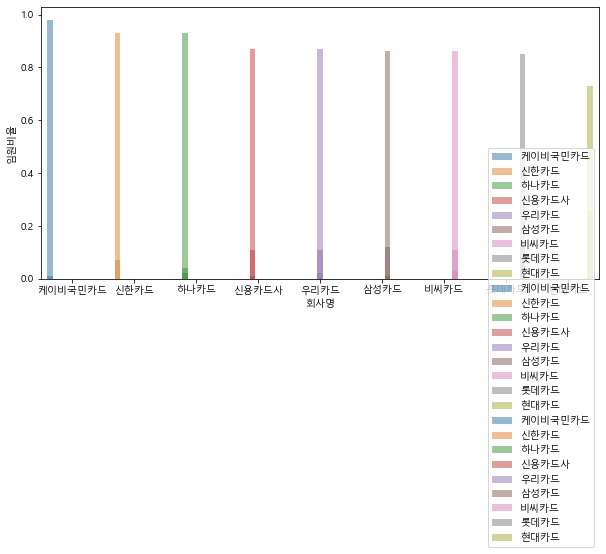

In [120]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=data, y="정규직비율", x="회사명", hue="회사명",  alpha = 0.5)
sns.barplot(data=data, y="비정규직비율", x="회사명", hue="회사명",alpha = 0.5)
sns.barplot(data=data, y="임원비율", x="회사명", hue="회사명", alpha = 0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

<BarContainer object of 9 artists>

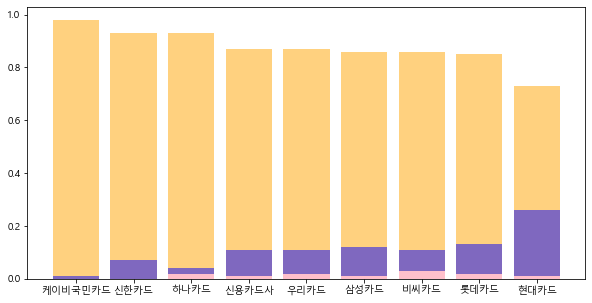

In [140]:
fig = plt.figure(figsize=(10, 5))
plt.bar(data["회사명"],data["정규직비율"], alpha = 0.5, color = "orange")
plt.bar(data["회사명"],data["비정규직비율"], alpha = 0.5, color="blue")
plt.bar(data["회사명"],data["임원비율"],  color = "pink")

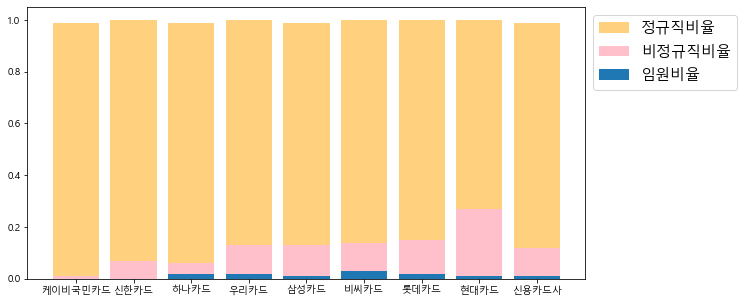

In [107]:
#누적 막대 차트
fig = plt.figure(figsize=(10, 5))
a_bottom = np.add(data["임원비율"], data["비정규직비율"])


x = range(len(data["회사명"]))
p1 = plt.bar(x, data["정규직비율"], bottom=a_bottom, alpha = 0.5, color = "orange")
p2 = plt.bar(x, data["비정규직비율"], bottom=data["임원비율"],color = "pink")
p3 = plt.bar(x, data["임원비율"])


plt.legend((p1[0], p2[0],p3[0]), ('정규직비율', '비정규직비율','임원비율'),bbox_to_anchor=(1, 1), fontsize=15)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(data["회사명"])

plt.show()

In [74]:
data_plt = data.iloc[:8,:]
data_plt

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3
0,현대카드,1899,0.01,0.73,0.26,"113,000,000","73,000,000",7.06,6.88,112579870000000,16.29


In [57]:
data_plt.iat[1,5] = "122,000,000"
data_plt.iat[1,6] = "96,000,000"
data_plt

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
5,케이비국민카드,1618,0.00,0.98,0.01,"130,000,000","78,000,000",16.48,8.86,116424968000000,16.85
4,신한카드,2631,0.00,0.93,0.07,"122,000,000","96,000,000",16.4,10.9,149831676000000,21.69
7,하나카드,763,0.02,0.93,0.04,"111,000,000","68,000,000",12.6,10.7,53116775000000,7.69
6,우리카드,866,0.02,0.87,0.11,"103,000,000","61,000,000",8.5,5.4,63475834000000,9.19
3,삼성카드,2057,0.01,0.86,0.12,"132,000,000","84,000,000",16.4,10.9,123872095000000,17.93
2,비씨카드,861,0.03,0.86,0.11,"133,000,000","80,000,000",14.42,6.86,433730000000,0.06
1,롯데카드,1396,0.02,0.85,0.13,"87,000,000","55,000,000",10.6,8.1,71160461000000,10.3


In [81]:
data_plt["남자평균급여"][4] = int(data_plt["남자평균급여"][4].replace(',',''))
data_plt["남자평균급여"][5] = int(data_plt["남자평균급여"][5].replace(',',''))
data_plt["남자평균급여"][7] = int(data_plt["남자평균급여"][7].replace(',',''))
data_plt["남자평균급여"][6] = int(data_plt["남자평균급여"][6].replace(',',''))
data_plt["남자평균급여"][3] = int(data_plt["남자평균급여"][3].replace(',',''))
data_plt["남자평균급여"][2] = int(data_plt["남자평균급여"][2].replace(',',''))
data_plt["남자평균급여"][1] = int(data_plt["남자평균급여"][1].replace(',',''))
data_plt["남자평균급여"][0] = int(data_plt["남자평균급여"][0].replace(',',''))
data_plt

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/90450249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["남자평균급여"][0] = int(data_plt["남자평균급여"][0].replace(',',''))


,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3
0,현대카드,1899,0.01,0.73,0.26,113000000,"73,000,000",7.06,6.88,112579870000000,16.29


In [83]:
data_plt["여자평균급여"][4] = int(data_plt["여자평균급여"][4].replace(',',''))
data_plt["여자평균급여"][5] = int(data_plt["여자평균급여"][5].replace(',',''))
data_plt["여자평균급여"][7] = int(data_plt["여자평균급여"][7].replace(',',''))
data_plt["여자평균급여"][6] = int(data_plt["여자평균급여"][6].replace(',',''))
data_plt["여자평균급여"][3] = int(data_plt["여자평균급여"][3].replace(',',''))
data_plt["여자평균급여"][2] = int(data_plt["여자평균급여"][2].replace(',',''))
data_plt["여자평균급여"][1] = int(data_plt["여자평균급여"][1].replace(',',''))
data_plt["여자평균급여"][0] = int(data_plt["여자평균급여"][0].replace(',',''))
data_plt

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/622219976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["여자평균급여"][0] = int(data_plt["여자평균급여"][0].replace(',',''))


,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3
0,현대카드,1899,0.01,0.73,0.26,113000000,73000000,7.06,6.88,112579870000000,16.29


In [84]:
data_plt["남녀평균급여차이"] = 0
for i in range(8):
    data_plt["남녀평균급여차이"][i] =  int(data_plt["남자평균급여"][i]) - int(data_plt["여자평균급여"][i])
data_plt

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/4048131224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["남녀평균급여차이"] = 0
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/4048131224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["남녀평균급여차이"][i] =  int(data_plt["남자평균급여"][i]) - int(data_plt["여자평균급여"][i])


,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율,남녀평균급여차이
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85,52000000
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69,26000000
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69,43000000
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19,42000000
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93,48000000
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06,53000000
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3,32000000
0,현대카드,1899,0.01,0.73,0.26,113000000,73000000,7.06,6.88,112579870000000,16.29,40000000


In [85]:
data_plt.loc[:,["회사명","총임직원수","임원비율","정규직비율","비정규직비율","남자평균급여","여자평균급여","남녀평균급여차이","남자평균근속연수","여자평균근속연수","이용실적누계액","카드점유율"]]
data_plt

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율,남녀평균급여차이
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85,52000000
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69,26000000
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69,43000000
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19,42000000
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93,48000000
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06,53000000
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3,32000000
0,현대카드,1899,0.01,0.73,0.26,113000000,73000000,7.06,6.88,112579870000000,16.29,40000000


In [96]:
data_plt["초봉급여"] = 0
data_plt

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/3153247532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["초봉급여"] = 0


,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율,남녀평균급여차이,초봉급여
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85,52000000,0
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69,26000000,0
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69,43000000,0
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19,42000000,0
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93,48000000,0
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06,53000000,0
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3,32000000,0
0,현대카드,1899,0.01,0.73,0.26,113000000,73000000,7.06,6.88,112579870000000,16.29,40000000,0


In [98]:
data_plt["초봉급여"][5] = "35950000"
data_plt["초봉급여"][4] = "40000000"
data_plt["초봉급여"][7] = "42950000"
data_plt["초봉급여"][6] = "35950000"
data_plt["초봉급여"][3] = "41800000"
data_plt["초봉급여"][2] = "40000000"
data_plt["초봉급여"][1] = "38000000"
data_plt["초봉급여"][0] = "50000000"
data_plt

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/1116752883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["초봉급여"][5] = "35950000"
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/1116752883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["초봉급여"][4] = "40000000"
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_12696/1116752883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plt["초봉급여"][7] = "42950000

,회사명,총임직원수,임원비율,정규직비율,비정규직비율,남자평균급여,여자평균급여,남자평균근속연수,여자평균근속연수,이용실적누계액,카드점유율,남녀평균급여차이,초봉급여
5,케이비국민카드,1618,0.00,0.98,0.01,130000000,78000000,16.48,8.86,116424968000000,16.85,52000000,35950000
4,신한카드,2631,0.00,0.93,0.07,122000000,96000000,16.4,10.9,149831676000000,21.69,26000000,40000000
7,하나카드,763,0.02,0.93,0.04,111000000,68000000,12.6,10.7,53116775000000,7.69,43000000,42950000
6,우리카드,866,0.02,0.87,0.11,103000000,61000000,8.5,5.4,63475834000000,9.19,42000000,35950000
3,삼성카드,2057,0.01,0.86,0.12,132000000,84000000,16.4,10.9,123872095000000,17.93,48000000,41800000
2,비씨카드,861,0.03,0.86,0.11,133000000,80000000,14.42,6.86,433730000000,0.06,53000000,40000000
1,롯데카드,1396,0.02,0.85,0.13,87000000,55000000,10.6,8.1,71160461000000,10.3,32000000,38000000
0,현대카드,1899,0.01,0.73,0.26,113000000,73000000,7.06,6.88,112579870000000,16.29,40000000,50000000


In [ ]:
data_plt["위치"][0] = "서울특별시 종로구 내수동 167"
data_plt["위치"][0] = "서울시 "
data_plt["위치"][0] = "서울시 "
data_plt["위치"][0] = "서울시 종로구"
data_plt["위치"][0] = "서울시 "
data_plt["위치"][0] = "서울시 "
data_plt["위치"][0] = "서울시 "

In [70]:
data_plt.to_excel(excel_writer='카드사EDA.xlsx')

([<matplotlib.patches.Wedge at 0x2980e253460>,
 [Text(0.9494443776248264, 0.555477608726586, '케이비국민카드'),
  Text(-0.185376228157656, 1.084267335131904, '신한카드'),
  Text(-0.9764732369349631, 0.5064583078099872, '하나카드'),
  Text(-1.0985224776774334, -0.05699443865355063, '우리카드'),
  Text(-0.6804603638257297, -0.8642763986492722, '삼성카드'),
  Text(-0.11177299177911112, -1.0943065376341068, '비씨카드'),
  Text(0.24400300858691176, -1.0725961643603503, '롯데카드'),
  Text(0.9590695188958678, -0.5386888321887218, '현대카드')],
 [Text(0.5178787514317233, 0.3029877865781378, '16.9%'),
  Text(-0.10111430626781236, 0.591418546435584, '21.7%'),
  Text(-0.5326217656008889, 0.2762499860781748, '7.7%'),
  Text(-0.5991940787331453, -0.03108787562920943, '9.2%'),
  Text(-0.371160198450398, -0.4714234901723302, '17.9%'),
  Text(-0.060967086424969695, -0.5968944750731491, '0.1%'),
  Text(0.1330925501383155, -0.5850524532874637, '10.3%'),
  Text(0.5231288284886552, -0.2938302721029391, '16.3%')])

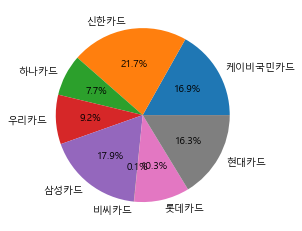

In [89]:
plt.pie(data_plt["카드점유율"], labels=data_plt["회사명"],autopct='%.1f%%')

<AxesSubplot:xlabel='회사명', ylabel='여자평균급여'>

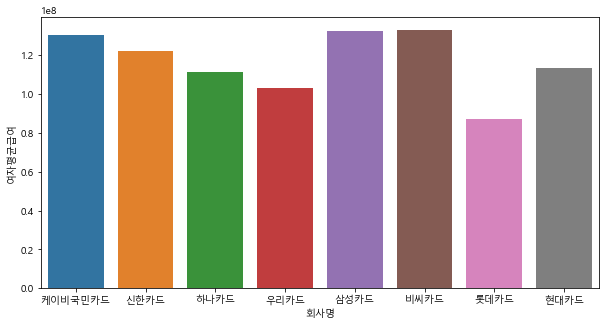

In [91]:
fig = plt.figure(figsize=(10, 5))
sns.barplot( x = data_plt["회사명"],  y= data_plt["남자평균급여"])
sns.barplot( x = data_plt["회사명"],  y= data_plt["여자평균급여"])

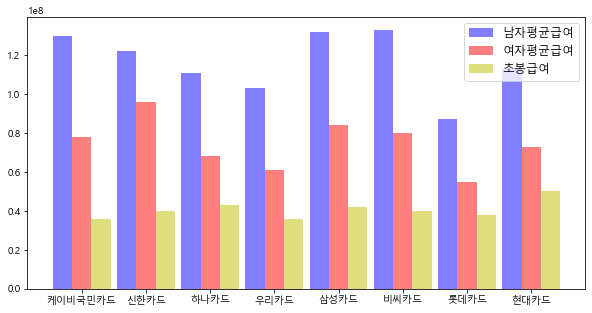

In [103]:
bar_width = 0.3
alpha = 0.5
fig = plt.figure(figsize=(10, 5))
index = np.arange(8)
p1 = plt.bar(index, data_plt["남자평균급여"] , bar_width, color='b',  alpha=alpha)
p2 = plt.bar(index+bar_width, data_plt["여자평균급여"],  bar_width,  color='r',   alpha=alpha)
p3 = plt.bar(index+bar_width*2, data_plt["초봉급여"],  bar_width,  color='y',   alpha=alpha)

plt.xticks(np.arange(bar_width, 8 + bar_width, 1),data_plt["회사명"])
plt.legend((p1[0], p2[0], p3[0]), ('남자평균급여', '여자평균급여','초봉급여'), fontsize=12)

plt.show()



### 워드 클라우드 

In [169]:
pip install WordCloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for WordCloud
Failed to build WordCloud
    Running setup.py install for WordCloud: started
    Running setup.py install for WordCloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\MEDICI\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\MEDICI\\AppData\\Local\\Temp\\pip-install-09fewia0\\wordcloud_8e10d40745a142a58b3da37a12bcd3f1\\setup.py'"'"'; __file__='"'"'C:\\Users\\MEDICI\\AppData\\Local\\Temp\\pip-install-09fewia0\\wordcloud_8e10d40745a142a58b3da37a12bcd3f1\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\MEDICI\AppData\Local\Temp\pip-wheel-_ppg_d1c'
       cwd: C:\Users\MEDICI\AppData\Local\Temp\pip-install-09fewia0\wordcloud_8e10d40745a142a58b3da37a12bcd3f1\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd6

In [175]:
from wordcloud import WordCloud
from konlpy.tag import Twitter 
from collections import Counter

In [212]:
#네이버 검색 api
import os
import sys
import urllib.request
client_id = "bPMf0r6A4Qf5gQ98fdwl"
client_secret = "s_KFpvAlRY"
encText = urllib.parse.quote("카드사 취업")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText+"&display=100"   # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Fri, 11 Mar 2022 17:05:22 +0900",
"total": 12123,
"start": 1,
"display": 100,
"items": [
{
"title": "금융권 종류 : 증권사 <b>취업</b> 및 은행권, <b>카드사</b> 방향성 정하기",
"link": "https:\/\/blog.naver.com\/llkk0107?Redirect=Log&logNo=222225863409",
"description": "글을 쓰기에 앞서 저 역시도 은행권 메인 / 증권사 <b>취업</b> 및 <b>카드사</b> 서브로 준비했기에 후자를 메인으로 파는 분들에 비해서는 지식이 얄팍하고 매우 부족합니다. 그래서 너무 깊게는 들어가지 않고 은행권 혹은... ",
"bloggername": "오! 멘토의 취업 뽀개기",
"bloggerlink": "https://blog.naver.com/llkk0107",
"postdate": "20210130"

},
{
"title": "긴급재난지원금 <b>카드사</b> 사용혼란정리, 정년연장/청년<b>취업</b>... ",
"link": "https:\/\/blog.naver.com\/blueiz3?Redirect=Log&logNo=221963748011",
"description": "긴급재난지원금 혼란 정리 (by <b>카드사</b>) 사용할 수 있는 카드의 범위? : 세대주인 배우자의 신용으로... 청년<b>취업</b>이 줄어든다?? : 한국개발연구원 발표 &quot;실제 연구 결과도 이와 동일&quot; : 지난 2013년 고령자 고용법... ",
"bloggername": "Brad",
"bloggerlink": "https://blog.naver.com/blueiz3",
"postdate": "20200515"

},
{
"title": "[<b>카드사</b>] 31세 중고신입 금융회사 <b>취업</b> 썰.",
"link": "https:\/\/blog.naver.

In [219]:
Search_Naver =json.loads(response_body.decode('utf-8')) 
for i in range (len(Search_Naver["items"])):
    Search_Naver["items"][i]["description"] = Search_Naver["items"][i]["description"].replace('<b>','')
    Search_Naver["items"][i]["description"] = Search_Naver["items"][i]["description"].replace('</b>', '')   
    print( Search_Naver["items"][i]["description"])
    

글을 쓰기에 앞서 저 역시도 은행권 메인 / 증권사 취업 및 카드사 서브로 준비했기에 후자를 메인으로 파는 분들에 비해서는 지식이 얄팍하고 매우 부족합니다. 그래서 너무 깊게는 들어가지 않고 은행권 혹은... 
긴급재난지원금 혼란 정리 (by 카드사) 사용할 수 있는 카드의 범위? : 세대주인 배우자의 신용으로... 청년취업이 줄어든다?? : 한국개발연구원 발표 &quot;실제 연구 결과도 이와 동일&quot; : 지난 2013년 고령자 고용법... 
취업 = 소개팅 그냥 구직은 일단 소개팅이랑 비슷하다.기본적으로 매력있는 사람이면 당연히 유리하고... 오히려 실패를 하도 많이 해봐서 그나마 약간은 알게 됐다고나 할까. 31세 중고신입 취업 썰, 끝.
지원분야 내가 이번에 지원한 직군은 신한카드 - B2사원 - 마케팅이었다 why 카드사? 취준하면서 다양한 산업군의 채용설명회에 참여했고 신한카드 마케팅 직군에서 핀테크 인턴 경험을 살릴 수... 
직장인 카드사들이 하반기 채용문을 열었다. 17일 취업정보사이트 캐치의 주요 기업 채용 공고에 따르면 현대카드, 현대커머셜, 현대캐피탈, 하나카드, SK바이오팜, 현대건설, 쏘카 등이 채용을 진행... 
카드사 취업한 형 저OOO 유명한 신불자OOO라서 카드만들길조차 OOO막막했음, 2011년 초 중반 나 아는 J라는 형이 H카드사 일하고 있을때(그형은 지금도 영업직 일하고 있다) OOO게 부탁부탁해서 만들어주면... 
#콜센터 #고객센터 #컨택센터 #콜센터취업 #카드사상담사 #카드사상담원 #카드 #감정노동자 #상담원 #상담사 #고객센터취업 #콜센터적응 #콜센터교육 #콜센터수습기간 #도급사 #직장내괴롭힘 #노동부신고 #진정... 
[취업특강] (주)이커리어 제주국제대학교 취업실전역량강화 특강 진행 - 3회차 은행, 보험, 증권, 카드사 취업! 금융권 취업 전략 편 (19.10.04) 안녕하세요! 취업 강의 및 컨설팅 대표 브랜드... 
카드사 취업을 희망하는 4학년 멘티입니다. 카드사의 영업직 입사를 희망하는데 주변에

In [220]:
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
https://blog.naver.com/hiamy0510/222632206792  -> 워드 클라우드

In [ ]:
https://blog.naver.com/zhelddyd111/222487941530